## Table of Contents

##### Importing Libraries
##### Reading Data
##### Data Analysis

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('/users/johnstonkirimo/Projects/weekly_analysis/stanford_open_policy/data/pa_philadelphia_2020_04_01.csv', low_memory = False)
data.head()

,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,411981,2014-01-01,1:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,arrest,True,False,True,True,False,Black - Non-Latino,True,False
1,407442,2014-01-01,1:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
2,217556,2014-01-01,3:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
3,217557,2014-01-01,3:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
4,230988,2014-01-01,8:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False


In [3]:
#How many rows and columns in dataset?

data.shape

(1048575, 22)

In [4]:
#Check summary statistis --  perhaps not very helpful, except for subject_age

data.describe()

,lat,lng,district,subject_age
count,961403.000000,961403.000000,1.048574e+06,1.045523e+06
mean,39.989229,-75.158797,1.847352e+01,3.473804e+01
std,0.043822,0.054935,1.053904e+01,1.339737e+01
min,39.875032,-75.275694,1.000000e+00,1.000000e+01
25%,39.956289,-75.194087,1.200000e+01,2.400000e+01
50%,39.990849,-75.159716,1.800000e+01,3.100000e+01
75%,40.023218,-75.129288,2.400000e+01,4.400000e+01
max,40.137445,-74.957707,7.700000e+01,1.100000e+02


In [6]:
#check columns and data types

data.dtypes

raw_row_number                object
date                          object
time                          object
location                      object
lat                          float64
lng                          float64
district                     float64
service_area                  object
subject_age                  float64
subject_race                  object
subject_sex                   object
type                          object
arrest_made                     bool
outcome                       object
contraband_found              object
frisk_performed                 bool
search_conducted                bool
search_person                   bool
search_vehicle                  bool
raw_race                      object
raw_individual_contraband       bool
raw_vehicle_contraband          bool
dtype: object

In [7]:
# Get max and min dates

max_date = data.date.max()
min_date = data.date.min()

print(max_date)
print(min_date)

2016-04-01
2014-01-01


In [10]:
#check for duplicated rows - keep last

dupes = data[data.duplicated(keep = 'last')]
dupes.shape

(0, 22)

### Proportion of stops by race

In [14]:
#Get the proportion of stops by race

data.subject_race.value_counts(dropna=False)

black                     688504
white                     224815
hispanic                  102708
asian/pacific islander     22748
unknown                     6585
other                       3215
Name: subject_race, dtype: int64

In [15]:
#Distriution of stops by race

data['subject_race'].value_counts(normalize=True, dropna=False)

black                     0.656609
white                     0.214400
hispanic                  0.097950
asian/pacific islander    0.021694
unknown                   0.006280
other                     0.003066
Name: subject_race, dtype: float64

In [16]:
#check stops where subject_race is 'unknown'

data[data.subject_race == 'unknown'].sample(5)

,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
678400,770707,2015-07-03,22:20:00,6000 BLOCK WASHINGTON AV,NaN,NaN,18.0,181,32.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
231636,223815,2014-08-11,7:50:00,BELMONT AV / LANCASTER AV,39.968724,-75.211322,16.0,162,33.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
246193,229274,2014-08-23,0:10:00,FRANKFORD AV / PRATT ST,40.022360,-75.078150,15.0,151,59.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
485499,572692,2015-02-20,0:02:00,S 46TH ST / SPRINGFIELD AV,39.947902,-75.213883,18.0,183,23.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False
118934,415189,2014-05-11,16:40:00,NaN,NaN,NaN,19.0,193,26.0,unknown,...,False,NaN,NaN,False,False,False,False,Unknown,False,False


In [17]:
# add year and month columns

data['year'] = data['date'].str[:4]
data['month'] = data['date'].str[5:7]
data.head(3)

,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband,year,month
0,411981,2014-01-01,1:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,False,True,True,False,Black - Non-Latino,True,False,2014,01
1,407442,2014-01-01,1:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,False,True,True,True,False,Black - Non-Latino,False,False,2014,01
2,217556,2014-01-01,3:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.19268,18.0,183,24.0,black,...,NaN,False,False,False,False,Black - Non-Latino,False,False,2014,01


### Does the propotion of stops differ from year to year

In [18]:
#stops by year and raw_race?

year_and_race = data.groupby(['year', 'subject_race']).year.count().reset_index(name='count')
year_and_race

,year,subject_race,count
0,2014,asian/pacific islander,9292
1,2014,black,271687
2,2014,hispanic,41160
3,2014,other,1410
4,2014,unknown,2029
5,2014,white,92453
6,2015,asian/pacific islander,10976
7,2015,black,337801
8,2015,hispanic,49258
9,2015,other,1449


In [21]:
#Reshaping the year_and_race df

grouped_df = pd.pivot_table(year_and_race, columns=['year'], values=['count'], index='subject_race')
grouped_df

count               
year                      2014    2015   2016
subject_race                                 
asian/pacific islander    9292   10976   2480
black                   271687  337801  79016
hispanic                 41160   49258  12290
other                     1410    1449    356
unknown                   2029    3551   1005
white                    92453  107499  24863

In [27]:
#Get racial distribution of stops by year

data.groupby(['year']).subject_race.value_counts(normalize=True)

year  subject_race          
2014  black                     0.649921
      white                     0.221163
      hispanic                  0.098462
      asian/pacific islander    0.022228
      unknown                   0.004854
      other                     0.003373
2015  black                     0.661662
      white                     0.210562
      hispanic                  0.096483
      asian/pacific islander    0.021499
      unknown                   0.006955
      other                     0.002838
2016  black                     0.658412
      white                     0.207174
      hispanic                  0.102408
      asian/pacific islander    0.020665
      unknown                   0.008374
      other                     0.002966
Name: subject_race, dtype: float64

### Visualize the stops by each race

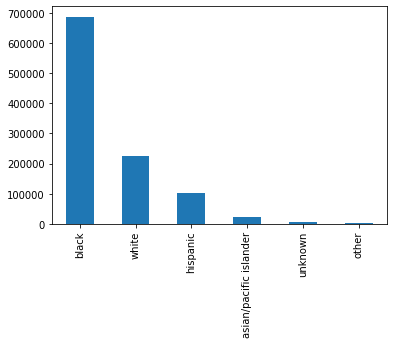

In [29]:
#plotting stops by race

data['subject_race'].value_counts().plot(kind = 'bar')

### Does a Persons Race affect whether they are stopped at a police traffic checkpoint?

In [30]:
#Map each subject_race by its total population size

population_by_race = {'asian/pacific islander':110864,
                'black':648846 ,'hispanic':221777,
                'other/unknown':39858, 
                'white':548312
              }

for key, value in population_by_race.items():
    print(key,value)

asian/pacific islander 110864
black 648846
hispanic 221777
other/unknown 39858
white 548312


In [31]:
#convert the dictionary to dataframe

pop_df = pd.DataFrame.from_dict(population_by_race, orient='index').rename(columns={0:'population_size'})
pop_df.index.names = ['subject_race']
pop_df

,population_size
subject_race,
asian/pacific islander,110864
black,648846
hispanic,221777
other/unknown,39858
white,548312


In [39]:
#merge stops and population


num_stops = data.groupby(['subject_race']).size().reset_index(name='total_stops')
num_stops

,subject_race,total_stops
0,asian/pacific islander,22748
1,black,688504
2,hispanic,102708
3,other,3215
4,unknown,6585
5,white,224815


In [49]:
stops_pivot = pd.pivot_table(num_stops, columns='subject_race', values='total_stops')
stops_pivot

subject_race,asian/pacific islander,black,hispanic,other,unknown,white
total_stops,22748,688504,102708,3215,6585,224815


In [54]:
stops_pivot['other/unknown'] = stops_pivot.other + stops_pivot.unknown
stops_pivot

subject_race,asian/pacific islander,black,hispanic,other,unknown,white,other/unknown
total_stops,22748,688504,102708,3215,6585,224815,9800


In [61]:
stops= stops_pivot.drop(['other','unknown'], axis=1)
stops

subject_race,asian/pacific islander,black,hispanic,white,other/unknown
total_stops,22748,688504,102708,224815,9800


In [74]:
#Renaming some columns

stops_volume = stops.rename(columns={'other/unknown': 'other', 'asian/pacific islander':'asian'})
stops_volume

subject_race,asian,black,hispanic,white,other
total_stops,22748,688504,102708,224815,9800


In [67]:
#Reshaping the population df

pop_df1 = pd.pivot_table(pop_df, columns='subject_race', values='population_size')
pop_df1

subject_race,asian/pacific islander,black,hispanic,other/unknown,white
population_size,110864,648846,221777,39858,548312


In [72]:

pop_volume = pop_df1.rename(columns={'other/unknown': 'other', 'asian/pacific islander':'asian'})

In [73]:
pop_volume

subject_race,asian,black,hispanic,other,white
population_size,110864,648846,221777,39858,548312


In [78]:
#matching the stops to populaion sizes for each race

stops_and_population = pd.concat([pop_volume, stops_volume], axis=0, sort=True)
stops_and_population

,asian,black,hispanic,other,white
population_size,110864,648846,221777,39858,548312
total_stops,22748,688504,102708,9800,224815


In [95]:
stops_and_population2 = stops_and_population.reset_index()

In [96]:
stops_and_population3 = stops_and_population2.rename(columns={'index':'category'})

In [97]:
stops_and_population3

,category,asian,black,hispanic,other,white
0,population_size,110864,648846,221777,39858,548312
1,total_stops,22748,688504,102708,9800,224815


In [99]:
#Ratio of stops to population
stops_and_population4 = pd.pivot_table(stops_and_population3, columns='category')
stops_and_population4

category,population_size,total_stops
asian,110864,22748
black,648846,688504
hispanic,221777,102708
other,39858,9800
white,548312,224815


In [104]:
stops_and_population4['stop_rate'] = (stops_and_population4.total_stops/stops_and_population4.population_size) 

In [105]:
stops_and_population4

category,population_size,total_stops,stop_rate
asian,110864,22748,0.205188
black,648846,688504,1.061121
hispanic,221777,102708,0.463114
other,39858,9800,0.245873
white,548312,224815,0.410013


## Some Insights:

### A person's race is a significant factor in whether or not they are stopped by traffic police 
   - Blacks are 106% times more likely to be stopped
   - Whites are 41% times more likely to be stopped 
   - Asians least likely to be stopped (20%) 

### Are younger people stopped more?

In [149]:
#Let's create age groups

data['age_grp'] = np.where(data.subject_age <= 18, 'Minor',
                          np.where(data.subject_age <= 65,'adult','senior'))

In [153]:
data.groupby('age_grp').size()

age_grp
Minor      52523
adult     971341
senior     24711
dtype: int64

In [154]:
data['age_grp'].value_counts(normalize = True)

adult     0.926344
Minor     0.050090
senior    0.023566
Name: age_grp, dtype: float64

### Of those stopped, how many are arrested?

In [119]:
#checking the 'outcome' column to better understand the data

data.outcome.value_counts(dropna=False)

NaN       990462
arrest     58113
Name: outcome, dtype: int64

In [130]:
#replace nan with zeros

data_clean = data.outcome.fillna(0)

In [ ]:
df[['a', 'b']] = df[['a','b']].fillna(value=0)

In [131]:
data[['outcome']] = data[['outcome']].fillna(value=0)

In [135]:
data['outcome'].head()

0    arrest
1    arrest
2         0
3         0
4         0
Name: outcome, dtype: object

In [139]:
#Create new 'arrest' column

data['arrest']= np.where(data.outcome == 'arrest',1,0)

In [140]:
data[['outcome','arrest']].head(10)

,outcome,arrest
0,arrest,1
1,arrest,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [143]:
data.arrest.sum()/len(data.arrest)

0.055420928402832415

##### 5.5 % of those stopped are arrested